In [1]:
print("hii")

hii


Dataset Loaded Successfully
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female

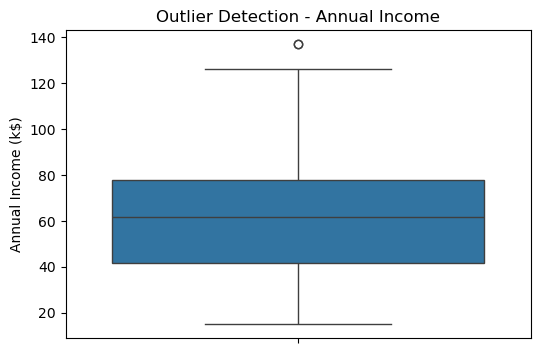


Feature Engineering Done


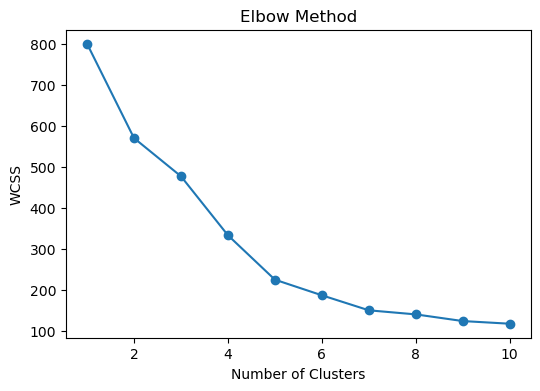


Silhouette Score Comparison:
   Silhouette Score
2          0.314258
3          0.309793
4          0.385119
5          0.411149
6          0.419866
7          0.427593

Clustering Completed
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Income_to_Spending_Ratio  Cluster  
0                  0.375000        2  
1                  0.182927        2  
2                  2.285714        2  
3                  0.205128        2  
4                  0.414634        2  

Final Silhouette Score: 0.41114940625449664


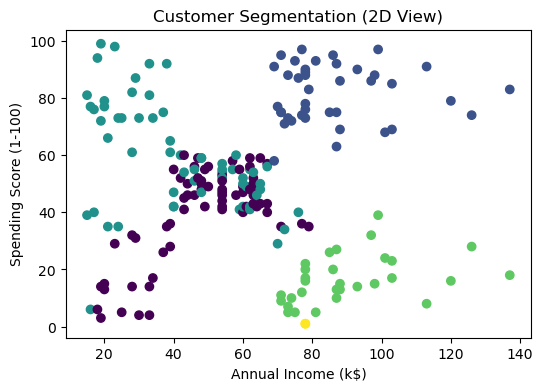

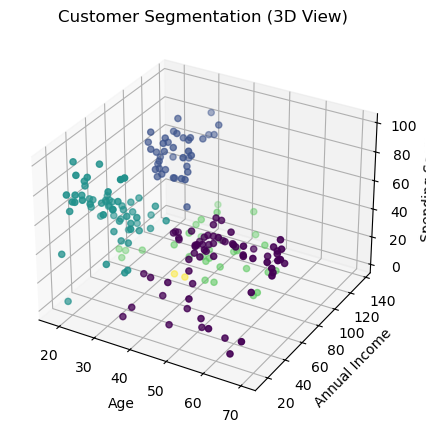

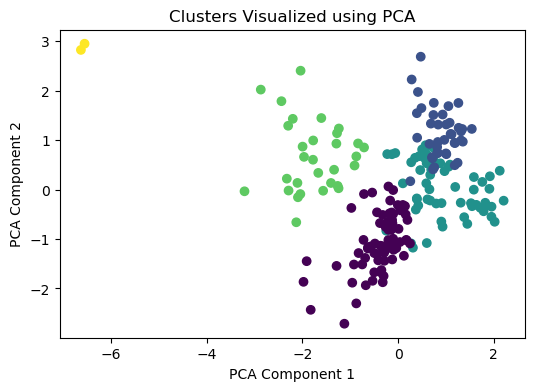


Cluster Characteristics (Numeric Columns Only):
   Cluster  CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
0        0   71.941176  53.191176           48.661765               40.294118   
1        1  161.025000  32.875000           86.100000               81.525000   
2        2   57.450000  25.433333           41.633333               59.000000   
3        3  166.800000  41.366667           90.166667               16.566667   
4        4  158.000000  35.500000           78.000000                1.000000   

   Income_to_Spending_Ratio  
0                  1.466389  
1                  1.057971  
2                  0.822680  
3                  6.273616  
4                 39.000000  

Segment Naming Done
   Cluster      Segment_Name
0        2  Impulse Shoppers
1        2  Impulse Shoppers
2        2  Impulse Shoppers
3        2  Impulse Shoppers
4        2  Impulse Shoppers


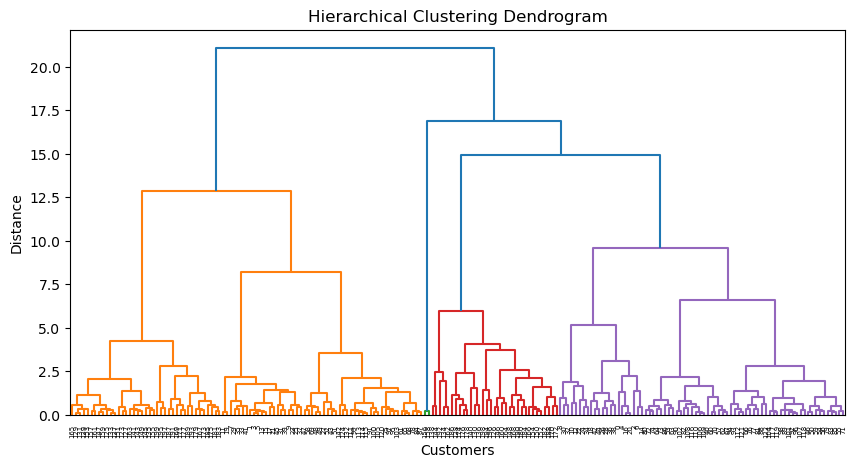


Predicted Cluster for New Customer: [2]
Predicted Segment: Impulse Shoppers

Final segmented dataset saved successfully!


In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



# =====================================================
# 1. Import Required Libraries
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

# =====================================================
# 2. Load Dataset
# =====================================================
data = pd.read_csv("Documents/jupyprojectsnoteS/Mall_Customers.csv")

print("Dataset Loaded Successfully")
#print(data.head())
# =====================================================
# Display All Rows and Columns
# =====================================================
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.width', None)         # Auto-detect width
pd.set_option('display.max_colwidth', None)  # Show full column contents

# Now print the entire dataset
print(data)



# =====================================================
# 3. Data Understanding
# =====================================================
print("\nDataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nDataset Info:")
print(data.info())
print("\nStatistical Summary:")
print(data.describe())

# =====================================================
# 4. Missing Value Check
# =====================================================
print("\nMissing Values:\n", data.isnull().sum())

# =====================================================
# 5. Outlier Detection (Visualization)
# =====================================================
plt.figure(figsize=(6,4))
sns.boxplot(data['Annual Income (k$)'])
plt.title("Outlier Detection - Annual Income")
plt.show()

# =====================================================
# 6. Feature Engineering (EXTRA)
# =====================================================
data['Income_to_Spending_Ratio'] = (
    data['Annual Income (k$)'] / (data['Spending Score (1-100)'] + 1)
)

print("\nFeature Engineering Done")

# =====================================================
# 7. Feature Selection
# =====================================================
X = data[['Age',
          'Annual Income (k$)',
          'Spending Score (1-100)',
          'Income_to_Spending_Ratio']]

# =====================================================
# 8. Feature Scaling
# =====================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =====================================================
# 9. Elbow Method
# =====================================================
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# =====================================================
# 10. Silhouette Score Comparison (EXTRA)
# =====================================================
scores = {}
for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

silhouette_df = pd.DataFrame.from_dict(
    scores, orient='index', columns=['Silhouette Score']
)

print("\nSilhouette Score Comparison:")
print(silhouette_df)

# =====================================================
# 11. Apply K-Means Clustering
# =====================================================
#kmeans = KMeans(n_clusters=5, random_state=42)
#clusters = kmeans.fit_predict(X_scaled)

#data['Cluster'] = clusters

#print("\nClustering Completed")
#print(data.head())

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters

print("\nClustering Completed")
print(data.head())

# =====================================================
# 12. Clustering Evaluation
# =====================================================
sil_score = silhouette_score(X_scaled, clusters)
print("\nFinal Silhouette Score:", sil_score)

# =====================================================
# 13. 2D Visualization
# =====================================================
plt.figure(figsize=(6,4))
plt.scatter(
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster']
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation (2D View)")
plt.show()

# =====================================================
# 14. 3D Visualization
# =====================================================
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster']
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
ax.set_title("Customer Segmentation (3D View)")
plt.show()

# =====================================================
# 15. PCA Visualization (EXTRA – ADVANCED)
# =====================================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualized using PCA")
plt.show()

# =====================================================
# 16. Cluster Interpretation
# =====================================================
#cluster_summary = data.groupby('Cluster').mean()
#print("\nCluster Characteristics:")
#print(cluster_summary)

# =====================================================
# 16. Cluster Interpretation (Numeric Columns Only)
# =====================================================
#group_col = 'Cluster'  # Column to group by

# Select only numeric columns
#numeric_cols = data.select_dtypes(include=np.number).columns

# Group by cluster and calculate mean
#cluster_summary = data[numeric_cols].groupby(data[group_col]).mean().reset_index()

#print("\nCluster Characteristics (Numeric Columns Only):")
#print(cluster_summary)

group_col = 'Cluster'  # Column to group by

# Select numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns

# Make sure the group_col is included
if group_col not in numeric_cols:
    numeric_cols = numeric_cols.tolist() + [group_col]

# Group by cluster and calculate mean
cluster_summary = data[numeric_cols].groupby(group_col).mean().reset_index()

print("\nCluster Characteristics (Numeric Columns Only):")
print(cluster_summary)


# =====================================================
# 17. Assign Business-Friendly Segment Names (EXTRA)
# =====================================================
segment_labels = {
    0: "High Value Customers",
    1: "Budget Buyers",
    2: "Impulse Shoppers",
    3: "Potential Loyalists",
    4: "Low Engagement Customers"
}

data['Segment_Name'] = data['Cluster'].map(segment_labels)

print("\nSegment Naming Done")
print(data[['Cluster', 'Segment_Name']].head())

# =====================================================
# 18. Hierarchical Clustering (Comparison)
# =====================================================
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# =====================================================
# 19. Predict Segment for New Customer (DEPLOYMENT STYLE)
# =====================================================
new_customer = [[25, 60, 80, 60/81]]
new_customer_scaled = scaler.transform(new_customer)
predicted_cluster = kmeans.predict(new_customer_scaled)

print("\nPredicted Cluster for New Customer:", predicted_cluster)
print("Predicted Segment:",
      segment_labels[predicted_cluster[0]])

# =====================================================
# 20. Save Final Dataset
# =====================================================
data.to_csv("Customer_Segments_Final.csv", index=False)
print("\nFinal segmented dataset saved successfully!")
